In [71]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")

In [47]:
inputPath = r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL"
retrofitdf = pd.read_csv(os.path.join(inputPath, "retro_prob_v2", "LGA_CODE_AAL.csv")).set_index('LGA_CODE')
retrofitv1df = pd.read_csv(os.path.join(inputPath, "retro_prob", "LGA_CODE_AAL.csv")).set_index('LGA_CODE')
baselinedf = pd.read_csv(os.path.join(inputPath, "pp_baseline", "structural_mean_LGA.csv")).set_index('LGA_CODE')

In [48]:
retrofitdf.drop('Unnamed: 0', inplace=True, axis=1)
retrofitv1df.drop('Unnamed: 0', inplace=True, axis=1)

In [10]:
baselineAAL = baselinedf['AAL'].loc[retrofitdf.index.values]

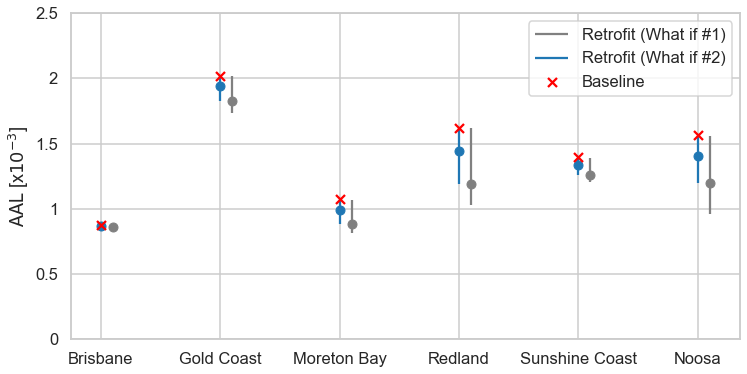

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(np.arange(len(retrofitdf))+0.1, retrofitv1df['0.5'], marker="o", linestyle='', color='gray')
ax.vlines(np.arange(len(retrofitdf))+0.1, retrofitv1df['0.05'], retrofitv1df['0.95'], color='gray', label="Retrofit (What if #1)")
ax.plot(range(len(retrofitdf)), retrofitdf['0.5'], marker="o", linestyle='')
ax.vlines(range(len(retrofitdf)), retrofitdf['0.05'], retrofitdf['0.95'], label="Retrofit (What if #2)")
ax.scatter(range(len(baselineAAL)), baselineAAL, color='red', marker='x', label="Baseline", zorder=10)
l = ax.get_xticklabels()
ax.set_xticks(range(len(baselineAAL)), labels=retrofitdf['LGA_NAME'].apply(lambda x: x[:-4]))
yticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1e3))
ax.yaxis.set_major_formatter(yticks)
ax.grid(True)
ax.set_ylim((0, 0.0025))
ax.set_ylabel(r"AAL [x$10^{-3}$]")
ax.legend()

In [75]:
retrofitdf['LGA_NAME'].apply(lambda x: x[:-4])

LGA_CODE
31000          Brisbane
33430        Gold Coast
35010       Moreton Bay
36250           Redland
36720    Sunshine Coast
35740             Noosa
Name: LGA_NAME, dtype: object